**<h1> Data Preparation <h1>**

---



In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, normalize, StandardScaler
from sklearn import metrics
import statsmodels.api as sm

In [57]:
df = pd.read_csv("bank-additional-full.csv", sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [58]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [60]:
df.shape

(41188, 21)

In [61]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [62]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

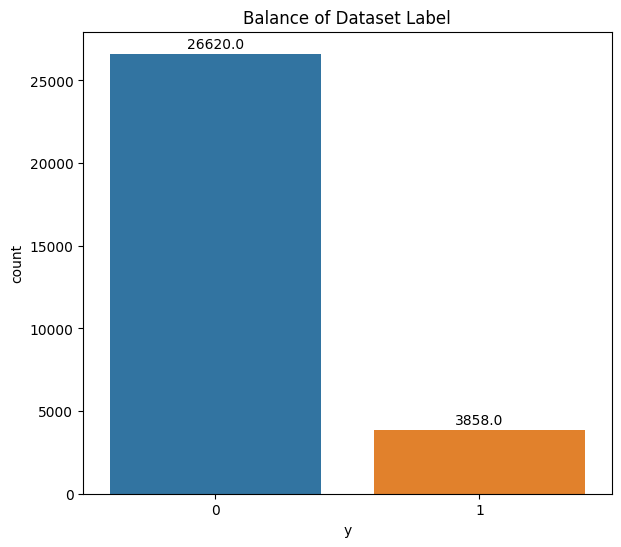

In [116]:
plt.rcParams['figure.figsize']=(15,6)
plt.subplot(121)
plt.title("Balance of Dataset Label")
ax = sns.countplot(x='y', data=df)
for i in ax.patches:
    ax.annotate(format(i.get_height(),'0.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center', va='center', xytext=(0,7), textcoords='offset points')
    


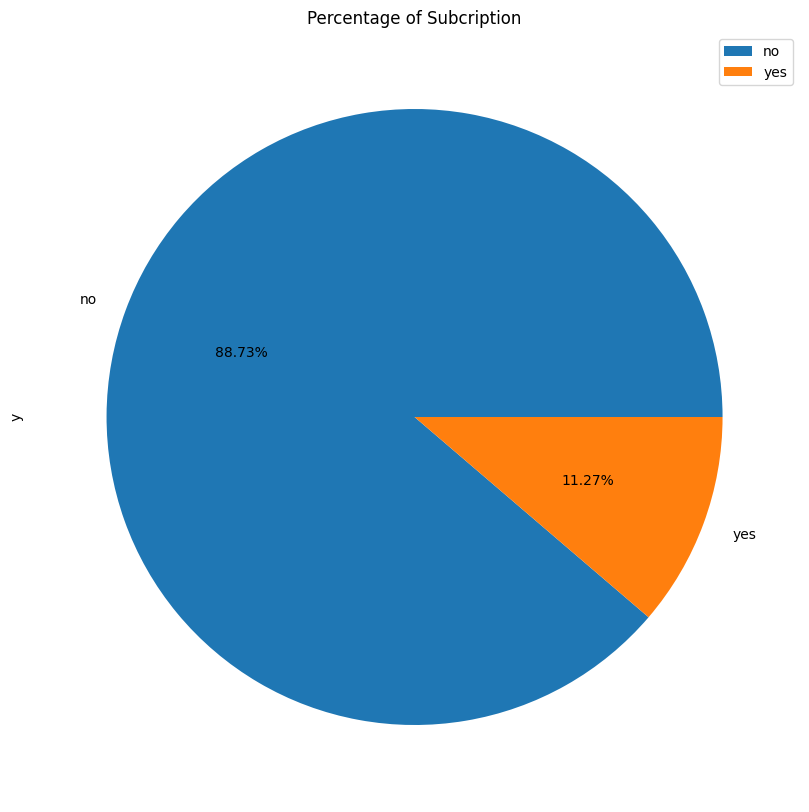

In [63]:
#membuat pie chart untuk target variabel
plt.figure(figsize=(10,10))
df['y'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title("Percentage of Subcription")
plt.legend()
plt.show()

**<h1> Preprocessing <h1>**

---



In [64]:
df = df[df.housing != 'unknown']
df = df[df.loan != 'unknown']
df = df[df.default != 'unknown']
df = df[df.job != 'unknown']
df = df[df.marital != 'unknown']
df = df[df.education != 'unknown']

In [65]:
df.shape

(30488, 21)

In [66]:
df.isnull().sum() #mengecek apakah ada missing value

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [67]:
df.duplicated().sum() #mengecek apakah ada duplicated value

10

In [68]:
df.drop_duplicates(inplace=True) #menghapus duplicated value yang ada

In [69]:
numerical_variables = ['age','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m',
                      'nr.employed']
df[numerical_variables].describe() #menampilkan statistik dari variabel numerik

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000
mean,39.029694,2.521721,956.318295,0.194337,-0.071425,93.523376,-40.602579,3.459976,5160.813967
std,10.332746,2.720495,201.404843,0.522862,1.610306,0.585366,4.788790,1.777215,75.158267
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,45.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,95.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [70]:
df.head() #menampilkan 5 data teratas

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [71]:
col = ['duration', 'pdays']
df.drop(col, axis=1,inplace=True)
#mengedrop kolom yang tidak digunakan

In [72]:
#melakukakn encode variabel kategorikal dengan label encoder
object_cols = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
label_encoder = LabelEncoder()
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [73]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'], dtype=object)

In [74]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df,test_size = 0.20 ,random_state = 20)
train_X = train.drop(labels='y',axis=1)
train_Y = train['y']
test_X  = test.drop(labels='y',axis=1)
test_Y  = test['y']

In [75]:
from imblearn.over_sampling import SMOTE

os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
train_smote_X,train_smote_Y = os.fit_resample(train_X,train_Y)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=train_X.columns)
train_smote_Y = pd.DataFrame(data = train_smote_Y)

**<h1> Modelling <h1>**

---



<h1> Logistic Regression <h1>

In [76]:
from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
model.fit(train_smote_X, train_smote_Y)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0, solver='liblinear')

In [79]:
print(model.intercept_, model.coef_)

[-0.00130741] [[-0.0169939  -0.01083686 -0.53698074 -0.01050441 -0.01136068 -0.69917338
  -1.23100925 -1.69054199 -0.10563686 -0.0865844  -0.12559049 -0.47597488
   0.13899911 -1.02262747  1.00757693  0.01348909  0.98857277 -0.01831252]]


In [80]:
pred1 = model.predict(test_X)
confusion_matrix(test_Y, pred1)

array([[4269, 1064],
       [ 290,  473]])

In [81]:
from sklearn.metrics import accuracy_score
print("Logistic Regression Accuracy : ",
      accuracy_score(test_Y,pred1))

Logistic Regression Accuracy :  0.7778871391076115


<h1> K-Nearest Neighbors <h1>

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [83]:
model2 = KNeighborsClassifier(metric='manhattan',n_neighbors=5, weights='distance')

In [84]:
model2.fit(train_smote_X, train_smote_Y)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='manhattan', weights='distance')

In [85]:
pred2=model2.predict(test_X)
CF2=confusion_matrix(test_Y, pred2)
CF2

array([[4314, 1019],
       [ 327,  436]])

In [86]:
from sklearn.metrics import accuracy_score
print("KNN Accuracy : ",
      accuracy_score(test_Y,pred2))

KNN Accuracy :  0.7791994750656168


<h1> Support Vector Machine <h1>

In [87]:
from sklearn.svm import SVC
from sklearn import svm 
esviem = SVC()

In [88]:
svm = svm.SVC(kernel='linear')

In [89]:
svm.fit(train_smote_X,train_smote_Y)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [90]:
pred3=svm.predict(test_X)
CF3=confusion_matrix(test_Y, pred3)
CF3

array([[4922,  411],
       [ 407,  356]])

In [91]:
print("SVM Accuracy: ",
      accuracy_score(test_Y,pred3))

SVM Accuracy:  0.8658136482939632


<h1> Decision Tree <h1>

In [92]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

In [93]:
model4 = DecisionTreeClassifier(criterion='entropy',max_depth=100)
model4.fit(train_smote_X,train_smote_Y)

DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [94]:
pred4=model4.predict(test_X)
CF4=confusion_matrix(test_Y, pred4)
CF4

array([[4592,  741],
       [ 433,  330]])

In [95]:
print("Decision Tree Accuracy: ",
      accuracy_score(test_Y,pred4))

Decision Tree Accuracy:  0.8074146981627297


<h1> Random Forest <h1>

In [96]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=20)

In [97]:
model5 = RandomForestClassifier(criterion='entropy',max_features='auto',n_estimators=1000)
model5.fit(train_smote_X,train_smote_Y)


<ipython-input-97-c93ff7dc1937>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model5.fit(train_smote_X,train_smote_Y)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(criterion='entropy', max_features='auto',
                       n_estimators=1000)

In [98]:
pred5=model5.predict(test_X)

In [99]:
from sklearn.metrics import confusion_matrix
CF=confusion_matrix(test_Y, pred5)
CF

array([[4875,  458],
       [ 378,  385]])

In [100]:
from sklearn.metrics import accuracy_score
print("Random Forest Accuracy : ",accuracy_score(test_Y,pred5))

Random Forest Accuracy :  0.8628608923884514


<h1> Naive Bayes <h1>

In [101]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [102]:
gnb.fit(train_smote_X, train_smote_Y)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [103]:
pred6 = gnb.predict(test_X)

In [104]:
from sklearn.metrics import confusion_matrix
CF6=confusion_matrix(test_Y, pred6)
CF6

array([[3733, 1600],
       [ 228,  535]])

In [105]:
from sklearn import metrics
print("Naive Bayes Accuracy :",metrics.accuracy_score(test_Y, pred6))

Naive Bayes Accuracy : 0.7001312335958005


In [109]:
print("Accuracy for Logistic Regression : ",
      accuracy_score(test_Y,pred1))
print("Accuracy for KNN                 : ",
      accuracy_score(test_Y,pred2))
print("Accuracy for SVM                 : ",
       accuracy_score(test_Y,pred3))
print("Accuracy for Decision Tree       : ",
      accuracy_score(test_Y,pred4))
print("Accuracy for Random Forest       : ",
      accuracy_score(test_Y,pred5))
print("Accuracy for Naive Bayes         : ",
      metrics.accuracy_score(test_Y, pred6))

Accuracy for Logistic Regression :  0.7778871391076115
Accuracy for KNN                 :  0.7791994750656168
Accuracy for SVM                 :  0.8658136482939632
Accuracy for Decision Tree       :  0.8074146981627297
Accuracy for Random Forest       :  0.8628608923884514
Accuracy for Naive Bayes         :  0.7001312335958005


Dari hasil diatas saya mendapatkan nilai akurasi terbaik merupakan akurasi yang menggunakan model SVM, lalu setelahnya hanya berbeda sedikit yaitu Random Forest. Akan tetapi setelah saya melakukan percobaan, Random Forest memakan waktu lebih lama jika dibandingkan dengan SVM.

In [ ]:
#from sklearn.linear_model import LogisticRegression
#model_lr = LogisticRegression()
#model_lr.fit(X_train, y_train)
#ypred = model_lr.predict(X_test)
#print("Accuracy: ",metrics.accuracy_score(y_test, ypred))
#print(metrics.confusion_matrix(y_test, ypred))
#print(metrics.classification_report(y_test, ypred))